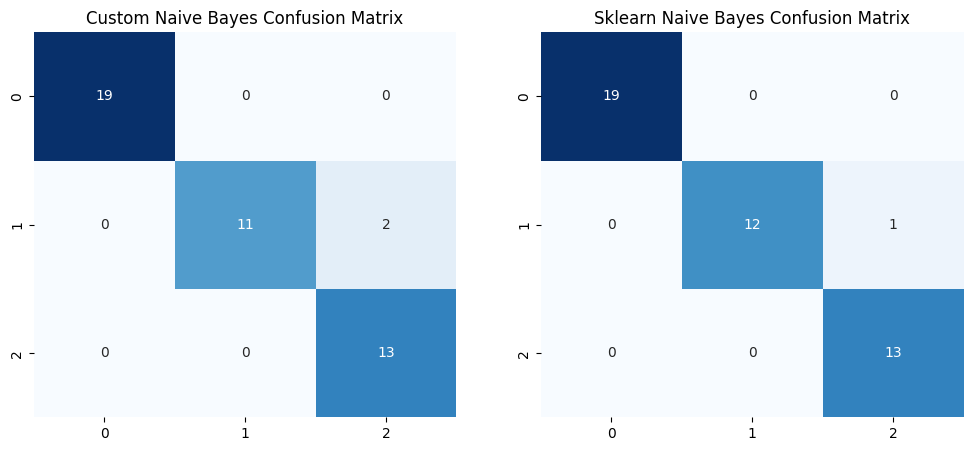

Custom accuracy: 0.9555555555555556
Custom precision: 0.9614814814814815
Custom recall: 0.9555555555555556

sklearn accuracy: 0.9777777777777777
sklearn precision: 0.9793650793650793
sklearn recall: 0.9777777777777777


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class MyNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.var = np.array([X[y == c].var(axis=0) for c in self.classes])
        self.prior = np.array([np.mean(y == c) for c in self.classes])

    def predict(self, X):
        likelihood = np.exp(-0.5 * ((X[:, None, :] - self.mean) ** 2) / self.var)
        posterior = np.sum(np.log(likelihood), axis=2) + np.log(self.prior)
        return self.classes[np.argmax(posterior, axis=1)]

my_nb = MyNaiveBayes()
my_nb.fit(X_train, y_train)
y_pred_custom = my_nb.predict(X_test)

sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train, y_train)
y_pred_sklearn = sklearn_nb.predict(X_test)

cm_custom = confusion_matrix(y_test, y_pred_custom)
acc_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom, average='weighted')
recall_custom = recall_score(y_test, y_pred_custom, average='weighted')

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title("Custom Naive Bayes Confusion Matrix")
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title("Sklearn Naive Bayes Confusion Matrix")

plt.show()

print("Custom accuracy:",acc_custom)
print("Custom precision:",precision_custom)
print("Custom recall:",recall_custom)
print()
print("sklearn accuracy:",acc_sklearn)
print("sklearn precision:",precision_sklearn)
print("sklearn recall:",recall_sklearn)


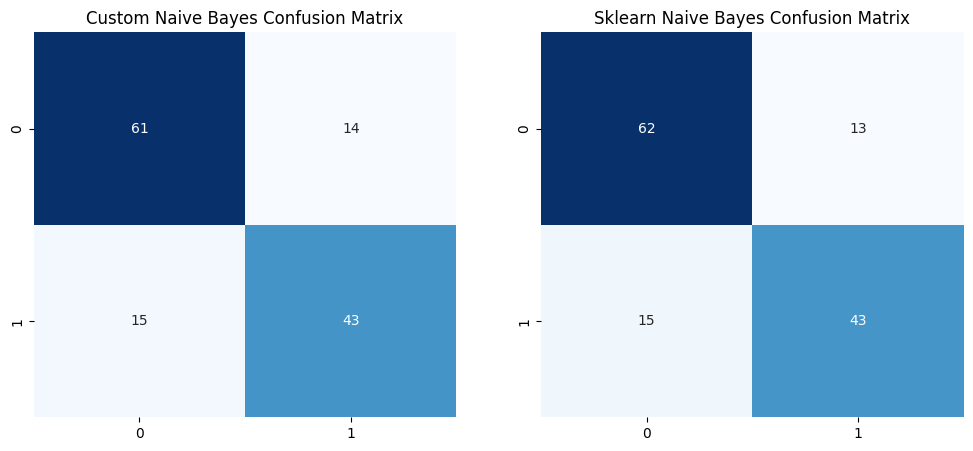

Custom accuracy: 0.7819548872180451
Custom precision: 0.7543859649122807
Custom recall: 0.7413793103448276

sklearn accuracy: 0.7894736842105263
sklearn precision: 0.7678571428571429
sklearn recall: 0.7413793103448276


In [26]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
y = (y > y.mean()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

my_nb1 = MyNaiveBayes()
my_nb1.fit(X_train, y_train)
y_pred_custom = my_nb1.predict(X_test)

sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train, y_train)
y_pred_sklearn = sklearn_nb.predict(X_test)

cm_custom = confusion_matrix(y_test, y_pred_custom)
acc_custom = accuracy_score(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title("Custom Naive Bayes Confusion Matrix")
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title("Sklearn Naive Bayes Confusion Matrix")

plt.show()

print("Custom accuracy:", acc_custom)
print("Custom precision:", precision_custom)
print("Custom recall:", recall_custom)
print()
print("sklearn accuracy:", acc_sklearn)
print("sklearn precision:", precision_sklearn)
print("sklearn recall:", recall_sklearn)